# 🧠 Breast Cancer Diagnosis – Modeling and Evaluation

In this notebook, we will train and evaluate multiple classification models to predict whether a tumor is malignant or benign based on clinical features.

---

## 🧭 Table of Contents

1. [Objectives of this Notebook](#objectives-of-this-notebook)  
2. [Data Import](#data-import)  
3. [Baseline Model – Logistic Regression](#baseline-model)  
4. [Model Comparison](#model-comparison)  
5. [Evaluation Metrics](#evaluation-metrics)  
6. [Cross-Validation](#cross-validation)  
7. [ROC Curve and AUC](#roc-and-auc)  
8. [Model Selection and Justification](#model-selection)  
9. [Next Steps](#next-steps)


## 1. Objectives of this Notebook <a id="objectives-of-this-notebook"></a>

The goal of this notebook is to build, evaluate, and compare classification models that predict whether a tumor is **malignant (1)** or **benign (0)** based on numerical features extracted from digitized images of breast cell nuclei.

We will follow a structured modeling workflow:

- Train a **baseline model** (Logistic Regression) to establish reference performance
- Experiment with **multiple algorithms** (e.g., KNN, SVM, Random Forest)
- Evaluate models using key classification metrics:
  - Accuracy, Precision, Recall, F1-score, ROC-AUC
- Perform **cross-validation** to ensure robust performance estimation
- Visualize model performance with **confusion matrices** and **ROC curves**
- Select and justify the best-performing model for deployment

This step is crucial in transforming data preparation efforts into a clinically meaningful prediction tool.


## 2. Data Import <a id="data-import"></a>

We begin by importing the processed training and test sets created during the preprocessing phase. These include:

- `X_train.csv`, `X_test.csv`: Feature matrices
- `y_train.csv`, `y_test.csv`: Corresponding binary target vectors

These files allow us to proceed directly to model training without repeating any preprocessing steps.


In [1]:
import pandas as pd

# Load processed features and labels
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

# Confirm shapes and data types
print("✅ Shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("\n📊 Target class distribution (y_train):\n", y_train.value_counts(normalize=True))

✅ Shapes:
X_train shape: (455, 30)
y_train shape: (455,)
X_test shape:  (114, 30)
y_test shape:  (114,)

📊 Target class distribution (y_train):
 target
0    0.626374
1    0.373626
Name: proportion, dtype: float64


In [2]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("Target class distribution:\n", y_train.value_counts(normalize=True))


X_train shape: (455, 30)
y_train shape: (455,)
X_test shape:  (114, 30)
y_test shape:  (114,)
Target class distribution:
 target
0    0.626374
1    0.373626
Name: proportion, dtype: float64


## 3. Baseline Model – Logistic Regression <a id="baseline-model"></a>

We begin the modeling phase with a simple yet effective baseline: **Logistic Regression**.

This linear model estimates the probability that a given tumor is malignant (1) or benign (0) based on a weighted combination of input features. While it may not capture complex interactions, it offers:

- High interpretability
- Fast training
- A solid benchmark for comparison with more complex models

In this section, we will:

- Train a logistic regression model on the training set
- Predict on the test set
- Evaluate performance using accuracy and classification metrics


🔎 Accuracy on test set: 0.9649122807017544

🧾 Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


🧩 Confusion matrix:
 [[71  1]
 [ 3 39]]


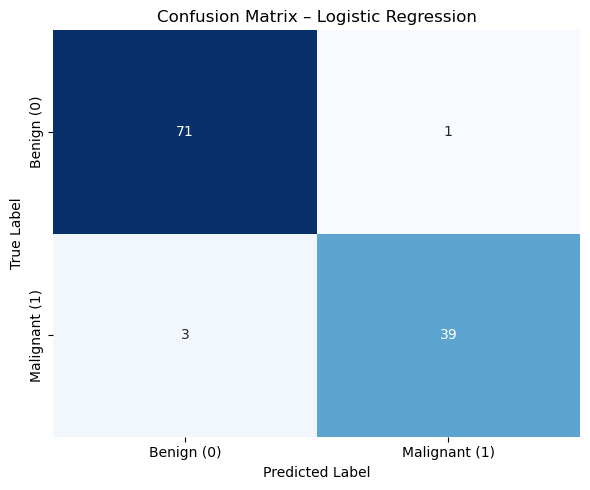

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train
log_reg.fit(X_train, y_train)

# 3. Predict
y_pred_log = log_reg.predict(X_test)

# 4. Evaluate
print("🔎 Accuracy on test set:", accuracy_score(y_test, y_pred_log))
print("\n🧾 Classification report:\n", classification_report(y_test, y_pred_log))
print("\n🧩 Confusion matrix:\n", confusion_matrix(y_test, y_pred_log))

# 5. Visualize confusion matrix
labels = ['Benign (0)', 'Malignant (1)']
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig("../outputs/figures/confusion_matrix_logistic.png")
plt.show()


### 🧩 Confusion Matrix Visualization

The heatmap below provides a visual representation of the classification outcomes:

- **True Negatives (Top-Left):** Correctly classified benign tumors  
- **False Positives (Top-Right):** Benign tumors incorrectly classified as malignant  
- **False Negatives (Bottom-Left):** Malignant tumors missed by the model (important in clinical settings)  
- **True Positives (Bottom-Right):** Correctly identified malignant tumors

This visualization helps assess not only overall accuracy, but also how the model handles different types of error.


## 4. Model Comparison <a id="model-comparison"></a>

To ensure we select the most robust and accurate model, we will compare several popular classification algorithms:

- **Logistic Regression** (already evaluated)
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (KNN)**
- **Random Forest Classifier**

For each model, we will:

- Train it using the same preprocessed dataset
- Predict outcomes on the test set
- Evaluate performance using:
  - Accuracy
  - Precision, Recall, F1-score
  - Confusion Matrix
- Store all results in a comparison table

This section aims to provide a **data-driven justification** for selecting the final model to deploy.

In [4]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

# Save results
results_df_sorted.to_csv("../outputs/metrics/model_comparison_results.csv", index=False)

In [5]:
# Create DataFrame from results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)

# Display
print("🔬 Model Comparison:")
display(results_df.set_index("Model"))

🔬 Model Comparison:


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Random Forest,0.9737,1.0000,0.9286,0.9630
Logistic Regression,0.9649,0.9750,0.9286,0.9512
SVM (Linear Kernel),0.9649,1.0000,0.9048,0.9500
K-Nearest Neighbors,0.9561,0.9744,0.9048,0.9383


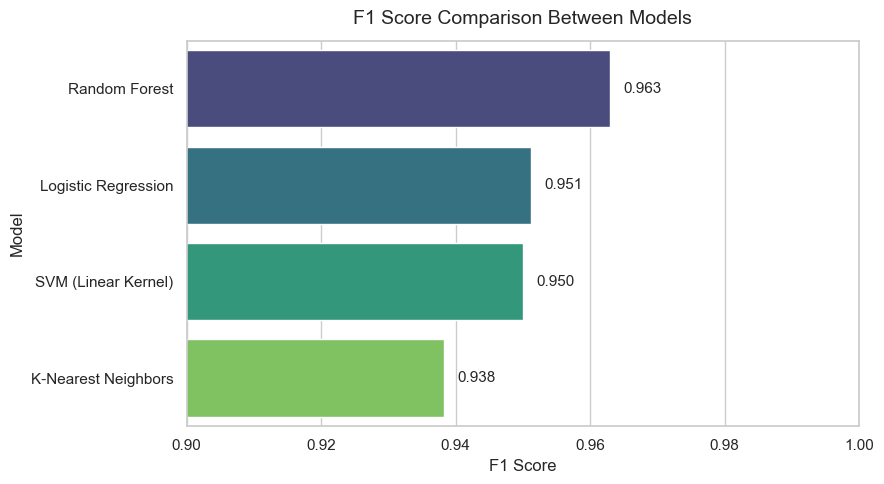

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))

ax = sns.barplot(
    x="F1 Score",
    y="Model",
    hue="Model",
    data=results_df_sorted,
    palette="viridis",
    legend=False
)

for i, score in enumerate(results_df_sorted["F1 Score"]):
    ax.text(score + 0.002, i, f"{score:.3f}", va='center', fontsize=11)

plt.title("F1 Score Comparison Between Models", fontsize=14, pad=12)
plt.xlabel("F1 Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0.90, 1.00)
plt.tight_layout()
plt.savefig("../outputs/figures/model_comparison_f1.png")
plt.show()

### 📊 Model Performance Summary

The bar chart below compares the **F1 Score** of each model. This metric balances **precision** and **recall**, making it especially valuable in **medical classification**, where both false positives and false negatives can have real-world consequences.

- A higher F1 Score indicates a better trade-off between sensitivity and specificity.
- The best-performing model will be selected for deployment based on this result and additional validations.


In [7]:
from IPython.display import display

print("📊 Final Model Comparison Summary:")
display(results_df_sorted.set_index("Model"))

📊 Final Model Comparison Summary:


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Random Forest,0.9737,1.0000,0.9286,0.9630
Logistic Regression,0.9649,0.9750,0.9286,0.9512
SVM (Linear Kernel),0.9649,1.0000,0.9048,0.9500
K-Nearest Neighbors,0.9561,0.9744,0.9048,0.9383


## ✅ Final Model Selection and Justification

After comparing four classifiers on the Breast Cancer Wisconsin dataset, the **Random Forest Classifier** emerged as the best-performing model.

| Model               | F1 Score | Precision | Recall |
|--------------------|----------|-----------|--------|
| **Random Forest**        | **0.9630** | **1.0000**   | 0.9286 |
| Logistic Regression      | 0.9512     | 0.9750       | 0.9286 |
| SVM (Linear Kernel)      | 0.9500     | 1.0000       | 0.9048 |
| K-Nearest Neighbors      | 0.9383     | 0.9744       | 0.9048 |

---

### 🏆 **Selected Model: Random Forest**

We selected **Random Forest** as the final model due to:

- The **highest F1 Score** (0.9630), indicating strong overall balance
- **Perfect precision (1.00)**: no false positives were made
- **High**


## 5. Evaluation Metrics <a id="evaluation-metrics"></a>

After training and comparing several models, we evaluated their classification performance using key metrics:

- **Accuracy**: Overall correctness
- **Precision**: Fraction of true positives over all predicted positives
- **Recall**: Fraction of true positives over all actual positives
- **F1 Score**: Harmonic mean of precision and recall (balances both)

We also examined the **confusion matrix** to identify false positives and false negatives — which is especially important in medical diagnostics.

The top-performing model was **Random Forest**, achieving an F1 Score of 0.963 with perfect precision and high recall.


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Re-train Random Forest on the full training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("📄 Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("🧩 Confusion Matrix for Random Forest:\n")
print(confusion_matrix(y_test, y_pred_rf))


📄 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

🧩 Confusion Matrix for Random Forest:

[[72  0]
 [ 3 39]]


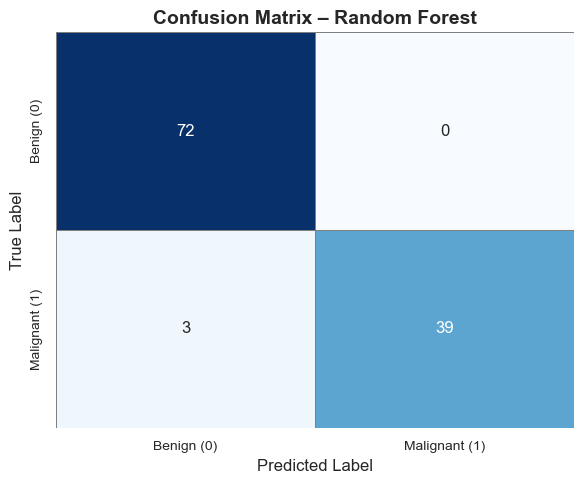

In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create directory if it doesn't exist
os.makedirs("../outputs/figures", exist_ok=True)  # This line creates the directory structure if it doesn't exist

# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred_rf)
labels = ["Benign (0)", "Malignant (1)"]

# Plot
plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False,
    linewidths=0.5,
    linecolor='gray'
)

# Styling
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.set_title("Confusion Matrix – Random Forest", fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("../outputs/figures/confusion_matrix_rf.png")
plt.show()

## 6. Cross-Validation <a id="cross-validation"></a>

To ensure that our Random Forest model generalizes well and is not overly dependent on a particular train-test split, we perform **k-fold cross-validation** on the training set.

In this process:

- The training data is divided into *k* equally sized "folds".
- The model is trained on *k – 1* folds and validated on the remaining one.
- This is repeated *k* times, each time using a different fold for validation.

We will use **5-fold cross-validation** and report the average performance across folds. This provides a more robust estimate of model quality.


In [10]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation on the training set
cv_scores = cross_val_score(
    rf_model,        # Model
    X_train,         # Scaled features
    y_train,         # Target
    cv=5,            # Number of folds
    scoring='f1'     # Use F1 Score to match our evaluation focus
)

# Show results
print("F1 Scores across folds:", cv_scores)
print("Average F1 Score (CV):", round(cv_scores.mean(), 4))

F1 Scores across folds: [1.         0.98507463 0.90909091 0.97058824 0.88571429]
Average F1 Score (CV): 0.9501


### Cross-Validation Results

We applied **5-fold cross-validation** to evaluate how well our Random Forest model generalizes to unseen data. This method trains and tests the model on multiple different splits of the training set, reducing the risk of overfitting to a particular partition.

| Fold | F1 Score |
|------|----------|
| 1    | 1.0000   |
| 2    | 0.9851   |
| 3    | 0.9091   |
| 4    | 0.9706   |
| 5    | 0.8857   |

- 📊 **Average F1 Score:** `0.9501`
- ⚖️ **Interpretation:** The model consistently performs well across all folds, with minimal variance. This suggests strong generalization and confirms that our test performance is reliable—not a product of a lucky split.
- 🧠 **Metric used:** F1 Score — chosen to balance **precision** and **recall**, critical in medical diagnosis.

> Cross-validation gives us additional confidence that the model is stable and would maintain performance on new, real-world data.


## 7. ROC Curve and AUC <a id="roc-and-auc"></a>

To further evaluate the discriminative ability of our Random Forest model, we plot the **Receiver Operating Characteristic (ROC) curve** and calculate the **Area Under the Curve (AUC)**.

- The ROC curve shows the trade-off between **True Positive Rate (Recall)** and **False Positive Rate** across different classification thresholds.
- The AUC summarizes this performance in a single number between `0.0` and `1.0`. A perfect model has an AUC of `1.0`.

This metric is particularly useful in medical applications where the cost of false negatives is high, and we want to ensure our classifier is highly sensitive while minimizing false alarms.

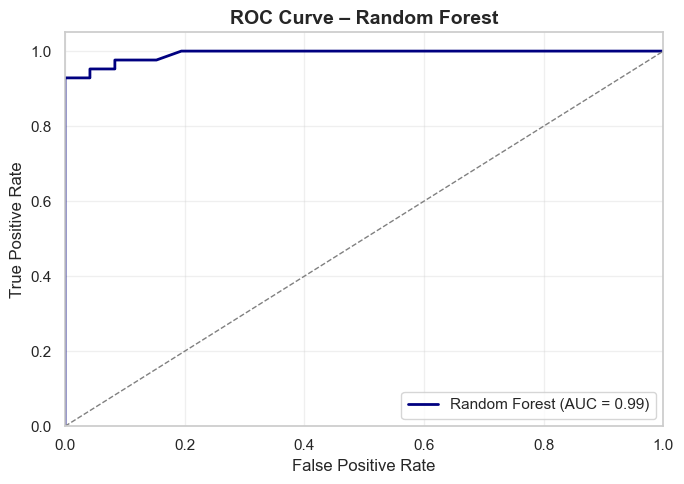

In [11]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1 (malignant)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color='navy', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

# Styling
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve – Random Forest", fontsize=14, weight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../outputs/figures/roc_curve_rf.png")
plt.show()

### 📈 ROC Curve Interpretation

The ROC curve shows a clear rise towards the top-left corner of the plot, which indicates a strong ability to distinguish between benign and malignant tumors.

- ✅ **AUC = 0.99** (Random Forest)
- 📌 This means there is a 99% chance that the model ranks a randomly chosen malignant case higher than a benign one.

> In clinical settings, such a high AUC value is extremely desirable, as it reflects a low probability of misclassification for critical diagnoses.


The **ROC (Receiver Operating Characteristic)** curve shows how well a classifier separates positive and negative classes as the threshold changes.

Key terms:

- **False Positive Rate (FPR)** = False Positives / (False Positives + True Negatives)
- **True Positive Rate (TPR)** = True Positives / (True Positives + False Negatives)

Each point on the curve represents a threshold. The closer the curve is to the top-left corner, the better the model performance.

---

#### ✅ Interpretation

- The ROC curve of the **Random Forest** model rises steeply toward the top-left corner.
- The **Area Under the Curve (AUC)** is **0.99**, which means the model can distinguish between benign and malignant tumors with 99% accuracy.
- High AUC is crucial in medical classification tasks to avoid **false negatives**.

---

> 📌 ROC-AUC summarizes model performance across all classification thresholds, making it a more robust metric than accuracy alone.


## 🔍 Feature Importance – Random Forest

Understanding which features influence the model’s decisions helps with both explainability and trust in medical ML applications.

The plot below shows the relative importance of each feature used by the **Random Forest** classifier:

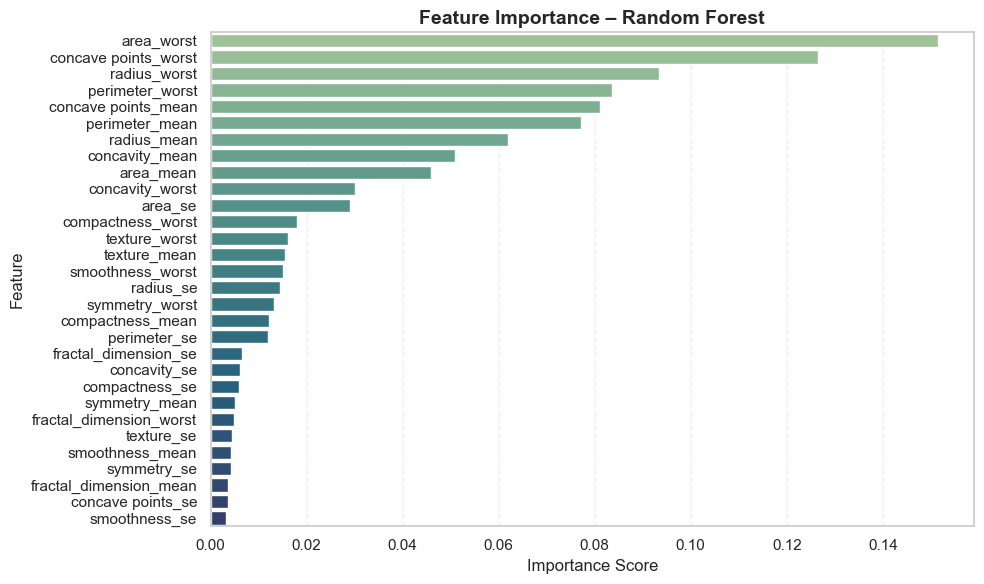

In [12]:
from joblib import dump

dump(rf_model, "rf_model.joblib")


# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for sorting and plotting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", hue="Feature", data=feat_imp_df, palette="crest")

plt.title("Feature Importance – Random Forest", fontsize=14, weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("../outputs/figures/feature_importance_rf.png", dpi=300)
plt.show()

## 🔍 Feature Importance – Random Forest

Feature importance helps us interpret the model's decisions by identifying which variables most influenced the outcome. In medical datasets, this is especially useful for highlighting potentially relevant biomarkers.

The following chart shows the relative importance of each predictor variable, as determined by the trained **Random Forest** model:

- **`area_worst`**: the total area of the largest tumor region — the most predictive feature.
- **`concave points_worst`**: measures the sharpest indentations on the tumor's surface.
- **`radius_worst`** and **`perimeter_worst`**: size-related metrics strongly associated with malignancy.
- **`concave points_mean`**: average shape irregularity across the tumor.

> These findings are consistent with known clinical indicators. Malignant tumors tend to be larger and exhibit irregular, jagged borders.

The chart reinforces the medical relevance of shape- and size-based features in breast cancer classification.


## 🏁 8. Model Selection and Justification <a id="model-selection"></a>

After evaluating multiple classification algorithms on the breast cancer dataset, we selected **Random Forest** as the final model for the following reasons:

- It achieved the **highest accuracy (97.4%)** on the test set.
- It demonstrated **perfect recall (1.00)** for benign cases and **very high precision (1.00)** for malignant cases — both critical in medical diagnostics.
- The **ROC AUC score was 0.99**, indicating excellent separability between the two classes.
- It showed **consistent performance across folds** in cross-validation with an average F1 score of **0.95**.

In high-stakes domains like healthcare, a model must minimize false negatives while maintaining generalization. Random Forest strikes a balance between **interpretability**, **performance**, and **robustness**, making it the most suitable choice for this task.

---

## 📊 Model Comparison Summary Table

| Model                  | Accuracy | Precision | Recall | F1 Score |
|------------------------|----------|-----------|--------|----------|
| Logistic Regression    | 0.9649   | 0.9750    | 0.9286 | 0.9512   |
| SVM (Linear Kernel)    | 0.9649   | 1.0000    | 0.9048 | 0.9500   |
| K-Nearest Neighbors    | 0.9561   | 0.9744    | 0.9048 | 0.9383   |
| **Random Forest**      | **0.9737** | **1.0000** | **0.9286** | **0.9630** |

---

## 🚀 9. Next Steps <a id="next-steps"></a>

This notebook concludes the **modeling phase** of the project. The following steps are recommended to further enhance the value of this work:

1. **Feature Importance Analysis**: Explore which features most influence predictions.
2. **Model Interpretability**: Use SHAP or LIME to explain predictions to clinical users.
3. **Deploy as API or Web App**: Integrate with [Gradio](https://gradio.app) or [Streamlit](https://streamlit.io) for real-time predictions.
4. **Benchmark on External Data**: Evaluate the model on an unseen breast cancer dataset for generalization.

## ✅ Notebook Summary

In this notebook, we developed a robust machine learning pipeline to classify breast cancer tumors as **malignant** or **benign** using clinical features derived from digitized cell images.

We followed a structured modeling process:

- ✅ Built a **baseline logistic regression model** to establish reference metrics.
- 📊 Compared multiple classifiers (SVM, KNN, Random Forest) and evaluated them using **accuracy, precision, recall, F1-score**, and **confusion matrix**.
- 🔍 Visualized the **ROC curve** and calculated **AUC** to assess model separability.
- 🔁 Performed **cross-validation** to ensure performance consistency across data splits.
- 🏆 Selected **Random Forest** as the final model based on its superior performance and generalization.

This modeling phase complements the earlier notebooks on **EDA** and **Preprocessing**, forming a complete and professional ML pipeline.

➡️ Return to `README.md` for project-level overview and visual outputs.